In [1]:
### Importing the necessary data files
from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8.csv
Saving Data7.csv to Data7.csv
Saving Data6.csv to Data6.csv
Saving Data5.csv to Data5.csv
Saving Data4.csv to Data4.csv
Saving Data3.csv to Data3.csv
Saving Data2.csv to Data2.csv
Saving Data1.csv to Data1.csv


In [295]:
### Creating pandas dataframes

import pandas as pd
data_1 = pd.read_csv('Data1.csv')
data_2 = pd.read_csv('Data2.csv')
data_3 = pd.read_csv('Data3.csv')
data_4 = pd.read_csv('Data4.csv')
data_5 = pd.read_csv('Data5.csv')
data_6 = pd.read_csv('Data6.csv')
data_7 = pd.read_csv('Data7.csv')
data_8 = pd.read_csv('Data8.csv')

# Task 1

1. Use K-means and hierarchical clustering methods to generate clusters
2. Evaluate the performance of the clustering algorithm using external validation metrics
3. Plot (2D or 3D) the data points for each dataset and color them according to the original class
4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

## **For Data1.csv**

### Analyzing the dataset provided

In [296]:
# Previewing the table
data_1.head()

### 3 attributes (X1, X2, and X3) are available and the Class is provided

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

In [297]:
data_1.describe()
### Here class is the predicted variable and can be treated as categorical/nominal - Hence, aggregate stats don't make sense
### It can be noticed that the range of values for X1, X2 and X3 are similar and hence, no scaling is required
### As the count of rows for each column is 212, there are no missing values

Unnamed: 0          X1          X2          X3       Class
count  212.000000  212.000000  212.000000  212.000000  212.000000
mean   106.500000    0.015418    0.034183   -0.035626    3.971698
std     61.343296    1.647716    1.670505    1.628822    2.016320
min      1.000000   -3.970394   -3.881493   -3.909294    1.000000
25%     53.750000   -0.407496   -0.476732   -0.423145    2.000000
50%    106.500000   -0.003762   -0.004597    0.021322    4.000000
75%    159.250000    0.438729    0.500722    0.384359    6.000000
max    212.000000    3.747710    3.774495    3.899389    7.000000

In [298]:
### Checking the number of distinct classes
print(data_1['Class'].unique()) ### There are 7 classes. Hence, K = 7

[1 2 3 4 5 6 7]


In [299]:
### Making a copy of the data frame to work on
data_1_copy = data_1.copy()

### Storing the original classes of objects as label1
label1 = data_1["Class"]



### Using K-means and hierarchical clustering methods to generate clusters

#### K-means clustering methods

In [300]:
# Importing required libraries

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [301]:
km_data_1 = KMeans(n_clusters=7)

In [302]:
predicted_class_km = km_data_1.fit_predict(data_1_copy[['X1','X2','X3']])
predicted_class_km

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [303]:
### Adding the predicted class as a column in the data_1_copy df
data_1_copy['predicted_class_km'] = predicted_class_km
data_1_copy.head()

Unnamed: 0        X1        X2        X3  Class  predicted_class_km
0           1 -0.063274  0.027734  0.022683      1                   5
1           2 -0.000731  0.048211  0.069198      1                   5
2           3 -0.060767 -0.009080  0.053085      1                   5
3           4  0.013252 -0.011876  0.055324      1                   5
4           5 -0.054508 -0.003813  0.001738      1                   5

#### Hierarchical clustering methods

In [304]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
predicted_class_h = cluster.fit_predict(data_1_copy[['X1','X2','X3']])
predicted_class_h

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [305]:
### Adding the predicted class as a column in the data_1_copy df
data_1_copy['predicted_class_h'] = predicted_class_h
data_1_copy.head()

Unnamed: 0        X1        X2        X3  Class  predicted_class_km  \
0           1 -0.063274  0.027734  0.022683      1                   5   
1           2 -0.000731  0.048211  0.069198      1                   5   
2           3 -0.060767 -0.009080  0.053085      1                   5   
3           4  0.013252 -0.011876  0.055324      1                   5   
4           5 -0.054508 -0.003813  0.001738      1                   5   

   predicted_class_h  
0                  6  
1                  6  
2                  6  
3                  6  
4                  6

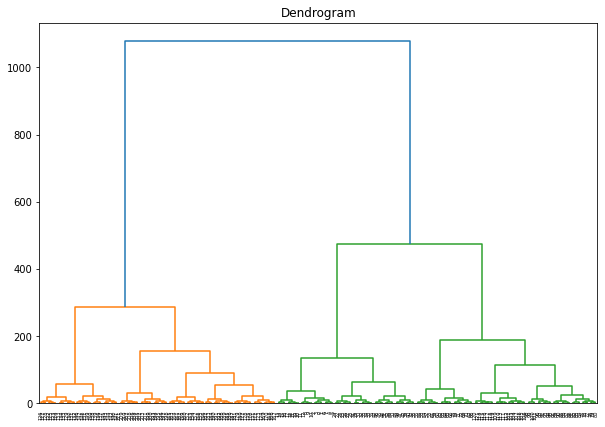

In [306]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters = shc.linkage(data_1, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation

In [307]:
### Writing a function to calculate TP, FP, TN, and FN along with fscore and accuracy of the model

def validation(cluster, labels):
    # Setting all variables to 0
    TP, TN, FP, FN = 0, 0, 0, 0
    n = len(labels)

    for i in range(n):
        for j in range(i + 1, n):
            # Creating a boolean variable that checks if a data pair belongs to the same original class
            same_label = (labels[i] == labels[j])
            # Creating a boolean variable that checks if the same data pair belongs to the same predicted class
            same_cluster = (cluster[i] == cluster[j])

            # TP: The number of data pairs found in the same cluster, both in predicted class (C) and in true class (P)
            if same_cluster:
                if same_label:
                    TP += 1  

                # FP: The number of data pairs found in the same cluster in C but in different clusters in P 
                else:
                    FP += 1

            # FN: The number of data pairs found in different clusters in C but in the same cluster in P
            elif same_label:
                FN += 1

            # TN: The number of data pairs found in different clusters, both in C and in P
            else:
                TN += 1
    
    # Computing precision, recall, fscore, and accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    fscore = 2 * (precision*recall)/(precision + recall)
    accuracy=(TP + TN)/(TP + FP + TN + FN)
    print("F1-score:",fscore)
    print("Accuracy:",accuracy)

#### F-1 score and accuracy of K-means method

In [308]:
validation(predicted_class_km, data_1['Class'])

F1-score: 1.0
Accuracy: 1.0


#### F-1 score and accuracy of hierarchical method

In [309]:
validation(predicted_class_h, data_1['Class'])

F1-score: 1.0
Accuracy: 1.0


### Plot the data points and color them according to the original class

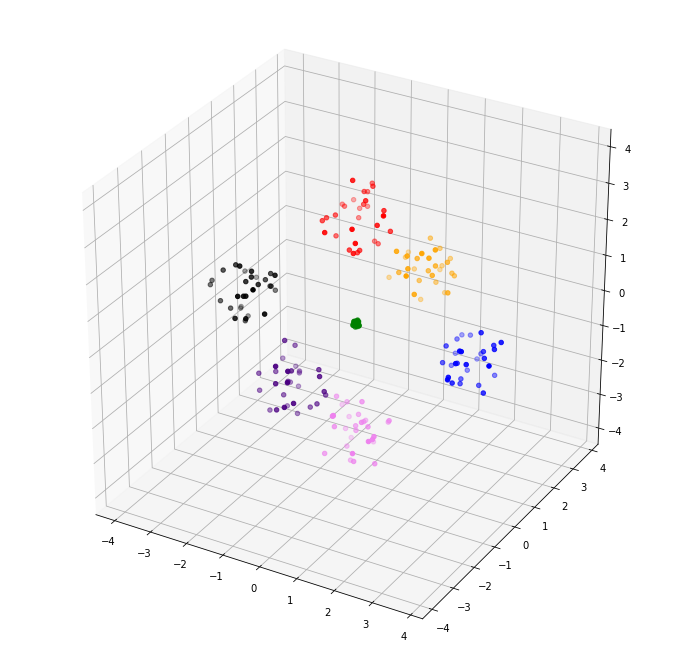

In [310]:
### Plotting a 3D scatter plot with original class values
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 7 clusters separately by creating a df for each predicted class
df0_true = data_1_copy[data_1_copy['Class']==1]
df1_true = data_1_copy[data_1_copy['Class']==2]
df2_true = data_1_copy[data_1_copy['Class']==3]
df3_true = data_1_copy[data_1_copy['Class']==4]
df4_true = data_1_copy[data_1_copy['Class']==5]
df5_true = data_1_copy[data_1_copy['Class']==6]
df6_true = data_1_copy[data_1_copy['Class']==7]

ax.scatter(df0_true['X1'], df0_true['X2'], df0_true['X3'], color='green')
ax.scatter(df1_true['X1'], df1_true['X2'], df1_true['X3'], color='blue')
ax.scatter(df2_true['X1'], df2_true['X2'], df2_true['X3'], color='black')
ax.scatter(df3_true['X1'], df3_true['X2'], df3_true['X3'], color='orange')
ax.scatter(df4_true['X1'], df4_true['X2'], df4_true['X3'], color='indigo')
ax.scatter(df5_true['X1'], df5_true['X2'], df5_true['X3'], color='red')
ax.scatter(df6_true['X1'], df6_true['X2'], df6_true['X3'], color='violet')
plt.show()

### Plot the data points and color them according to the class allocated by the clustering algorithm

#### K-means method

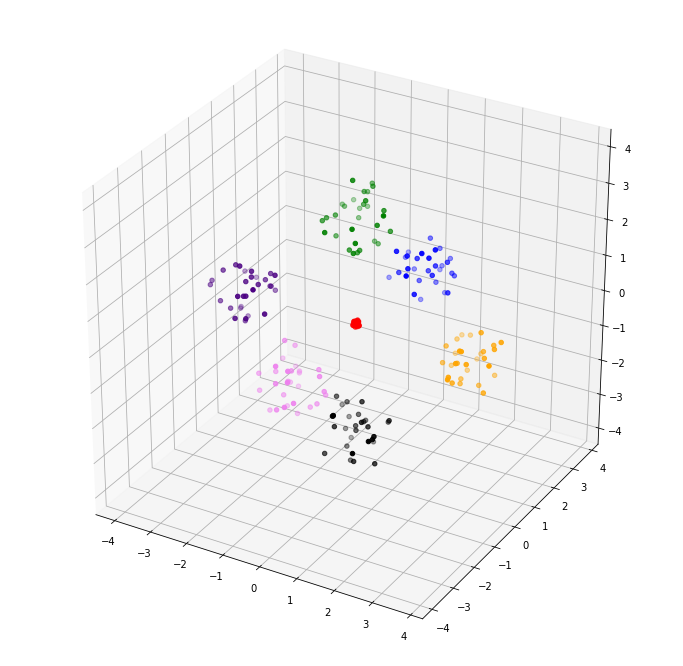

In [311]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 7 clusters separately by creating a df for each predicted class
df0 = data_1_copy[data_1_copy['predicted_class_km']==0]
df1 = data_1_copy[data_1_copy['predicted_class_km']==1]
df2 = data_1_copy[data_1_copy['predicted_class_km']==2]
df3 = data_1_copy[data_1_copy['predicted_class_km']==3]
df4 = data_1_copy[data_1_copy['predicted_class_km']==4]
df5 = data_1_copy[data_1_copy['predicted_class_km']==5]
df6 = data_1_copy[data_1_copy['predicted_class_km']==6]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
ax.scatter(df2['X1'], df2['X2'], df2['X3'], color='black')
ax.scatter(df3['X1'], df3['X2'], df3['X3'], color='orange')
ax.scatter(df4['X1'], df4['X2'], df4['X3'], color='indigo')
ax.scatter(df5['X1'], df5['X2'], df5['X3'], color='red')
ax.scatter(df6['X1'], df6['X2'], df6['X3'], color='violet')
plt.show()

#### Hierarchical methods

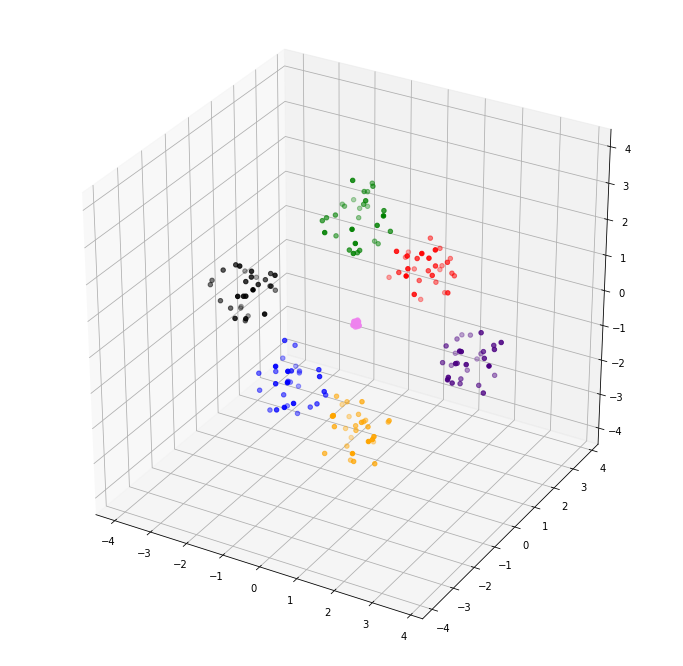

In [312]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 7 clusters separately by creating a df for each predicted class
df0 = data_1_copy[data_1_copy['predicted_class_h']==0]
df1 = data_1_copy[data_1_copy['predicted_class_h']==1]
df2 = data_1_copy[data_1_copy['predicted_class_h']==2]
df3 = data_1_copy[data_1_copy['predicted_class_h']==3]
df4 = data_1_copy[data_1_copy['predicted_class_h']==4]
df5 = data_1_copy[data_1_copy['predicted_class_h']==5]
df6 = data_1_copy[data_1_copy['predicted_class_h']==6]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
ax.scatter(df2['X1'], df2['X2'], df2['X3'], color='black')
ax.scatter(df3['X1'], df3['X2'], df3['X3'], color='orange')
ax.scatter(df4['X1'], df4['X2'], df4['X3'], color='indigo')
ax.scatter(df5['X1'], df5['X2'], df5['X3'], color='red')
ax.scatter(df6['X1'], df6['X2'], df6['X3'], color='violet')
plt.show()

## **For Data2.csv**

In [313]:
data_2.describe()
### As the count of rows for each column is 404, there are no missing values

X           Y           C       Class
count  404.000000  404.000000  404.000000  404.000000
mean     1.933463    1.810708    1.124684    1.772277
std      1.103075    1.485172    0.898426    0.855648
min      0.029780    0.004658   -0.151982    1.000000
25%      0.967144    0.532077    0.454854    1.000000
50%      1.727904    1.602773    0.786504    2.000000
75%      2.910134    2.756231    1.766672    3.000000
max      4.229498    5.385811    3.388138    4.000000

In [314]:
data_2_copy = data_2.copy()

In [315]:
data_2_copy.groupby(data_2_copy['Class'], as_index=False)['Unnamed: 0'].count()

### As there are 4 classes, K=4

Class  Unnamed: 0
0      1         200
1      2         100
2      3         100
3      4           4

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [316]:
km_data_2 = KMeans(n_clusters=4)
predicted_class_km2 = km_data_2.fit_predict(data_2_copy[['X','Y','C']])
predicted_class_km2

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 2,

In [317]:
data_2_copy['predicted_class_km2'] = predicted_class_km2
data_2_copy.head()

Unnamed: 0         X         Y         C  Class  predicted_class_km2
0         X1  3.277701  0.814082  0.326574      1                    1
1         X2  0.387577  0.176780  0.888046      1                    0
2         X3  0.268546  0.582963  0.080981      1                    0
3         X4  2.031145  0.244597  0.643921      1                    1
4         X5  0.188677  0.461280  0.496633      1                    0

#### Hierarchical clustering method

In [318]:
cluster2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
predicted_class_h2 = cluster2.fit_predict(data_2_copy[['X','Y','C']])
predicted_class_h2

array([3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [319]:
data_2_copy['predicted_class_h2'] = predicted_class_h2
data_2_copy.head()

Unnamed: 0         X         Y         C  Class  predicted_class_km2  \
0         X1  3.277701  0.814082  0.326574      1                    1   
1         X2  0.387577  0.176780  0.888046      1                    0   
2         X3  0.268546  0.582963  0.080981      1                    0   
3         X4  2.031145  0.244597  0.643921      1                    1   
4         X5  0.188677  0.461280  0.496633      1                    0   

   predicted_class_h2  
0                   3  
1                   1  
2                   1  
3                   1  
4                   1

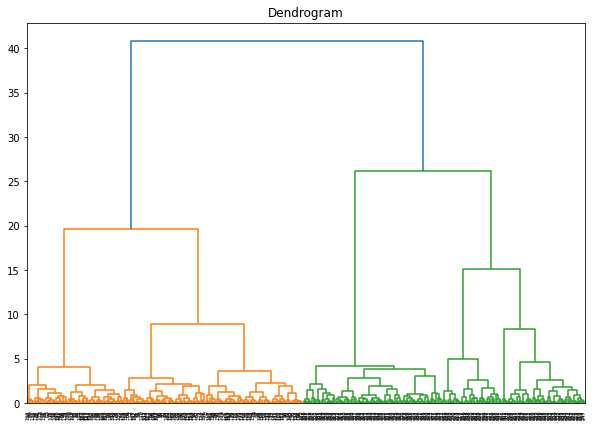

In [320]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters2 = shc.linkage(data_2_copy[['X','Y','C']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters2)
plt.show()


### Evaluate the performance of the clustering algorithm using external validation

1. TP : The number of data pairs found in the same cluster,
both in C and in P
2. FP: The number of data pairs found in the same cluster in
C but in different clusters in P
3. FN : The number of data pairs found in different clusters
in C but in the same cluster in P
4. TN : The number of data pairs found in different clusters,
both in C and in P

#### For K-Means method

In [321]:
validation(predicted_class_km2,data_2_copy['Class'])

F1-score: 0.7138643067846607
Accuracy: 0.8200746873694814


#### For Hierarchical method

In [322]:
validation(predicted_class_h2,data_2_copy['Class'])

F1-score: 0.8148235340278186
Accuracy: 0.8840503157015454


### Plot data points and color them according to the original class

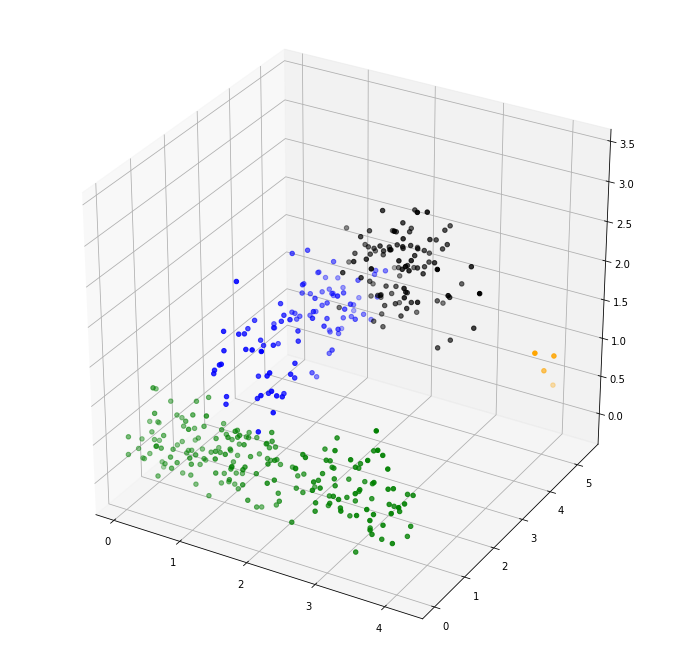

In [323]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 7 clusters separately by creating a df for each predicted class
df0 = data_2_copy[data_2_copy['Class']==1]
df1 = data_2_copy[data_2_copy['Class']==2]
df2 = data_2_copy[data_2_copy['Class']==3]
df3 = data_2_copy[data_2_copy['Class']==4]

ax.scatter(df0['X'], df0['Y'], df0['C'], color='green')
ax.scatter(df1['X'], df1['Y'], df1['C'], color='blue')
ax.scatter(df2['X'], df2['Y'], df2['C'], color='black')
ax.scatter(df3['X'], df3['Y'], df3['C'], color='orange')
plt.show()

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-means

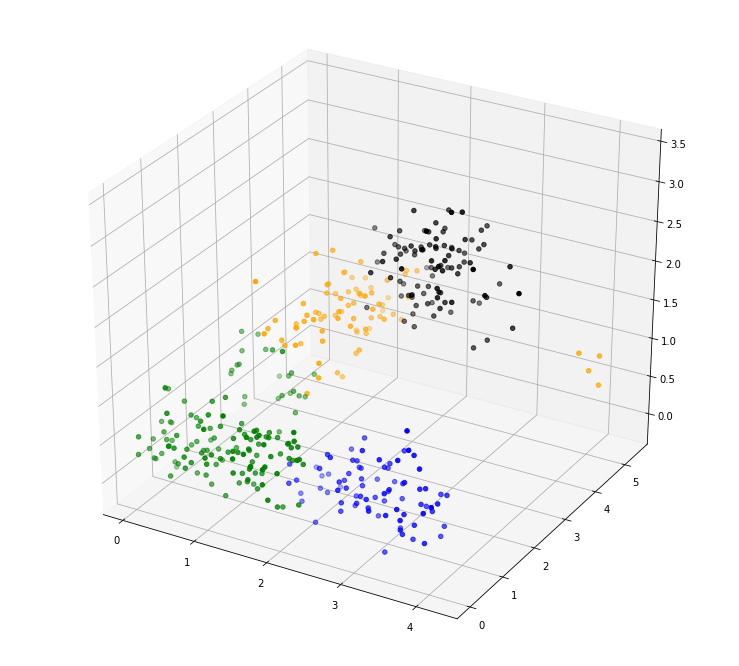

In [324]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(projection='3d')


df0 = data_2_copy[data_2_copy['predicted_class_km2']==0]
df1 = data_2_copy[data_2_copy['predicted_class_km2']==1]
df2 = data_2_copy[data_2_copy['predicted_class_km2']==2]
df3 = data_2_copy[data_2_copy['predicted_class_km2']==3]

ax.scatter(df0['X'], df0['Y'], df0['C'], color='green')
ax.scatter(df1['X'], df1['Y'], df1['C'], color='blue')
ax.scatter(df2['X'], df2['Y'], df2['C'], color='black')
ax.scatter(df3['X'], df3['Y'], df3['C'], color='orange')
plt.show()

#### Hierarchical

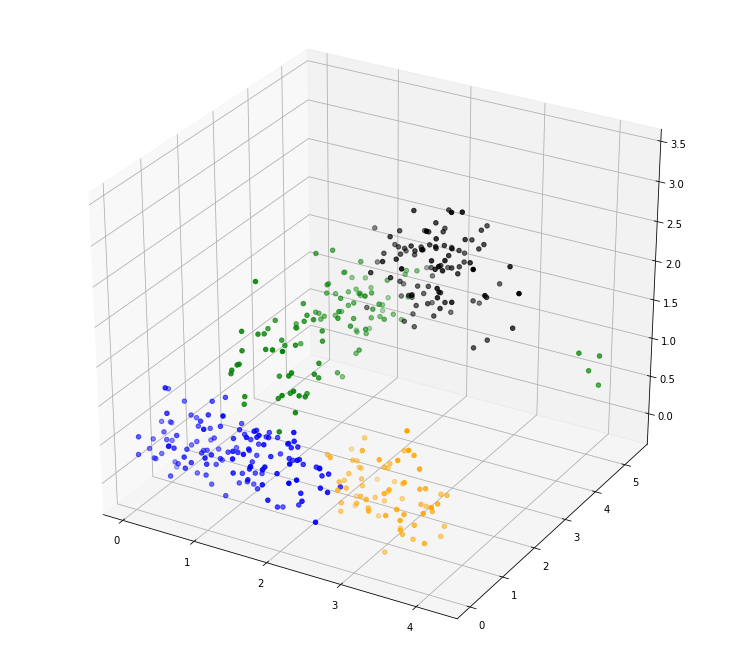

In [325]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(projection='3d')

df0 = data_2_copy[data_2_copy['predicted_class_h2']==0]
df1 = data_2_copy[data_2_copy['predicted_class_h2']==1]
df2 = data_2_copy[data_2_copy['predicted_class_h2']==2]
df3 = data_2_copy[data_2_copy['predicted_class_h2']==3]

ax.scatter(df0['X'], df0['Y'], df0['C'], color='green')
ax.scatter(df1['X'], df1['Y'], df1['C'], color='blue')
ax.scatter(df2['X'], df2['Y'], df2['C'], color='black')
ax.scatter(df3['X'], df3['Y'], df3['C'], color='orange')
plt.show()

## **For Data3.csv**

In [326]:
data_3.describe()
### It can be noticed that the range of values for X1, X2 and X3 are similar and hence, no scaling is required
### As the count of rows for each column is 400, there are no missing values

Unnamed: 0          X1          X2          X3       Class
count  400.000000  400.000000  400.000000  400.000000  400.000000
mean   200.500000    0.116703   -0.065265    0.023340    2.500000
std    115.614301    0.893028    0.890075    0.896590    1.119434
min      1.000000   -1.481394   -2.080121   -1.341069    1.000000
25%    100.750000   -0.496078   -0.719790   -0.622889    1.750000
50%    200.500000   -0.036501   -0.036603   -0.246845    2.500000
75%    300.250000    0.714768    0.568605    0.445541    3.250000
max    400.000000    2.090848    1.991350    2.238607    4.000000

In [327]:
print(data_3['Class'].unique())
### K=4

[1 2 3 4]


In [328]:
data_3_copy = data_3.copy()

In [329]:
data_3_copy.groupby(data_3_copy['Class'], as_index=False)['Unnamed: 0'].count()

Class  Unnamed: 0
0      1         100
1      2         100
2      3         100
3      4         100

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [330]:
km_data_3 = KMeans(n_clusters=4)
predicted_class_km3 = km_data_3.fit_predict(data_3_copy[['X1','X2','X3']])
predicted_class_km3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [331]:
data_3_copy['predicted_class_km3'] = predicted_class_km3
data_3_copy.head()

Unnamed: 0        X1        X2        X3  Class  predicted_class_km3
0           1  1.295428  0.050829 -0.385217      1                    2
1           2  1.409178 -0.035191 -0.251980      1                    2
2           3  1.096803  0.246365 -0.415011      1                    2
3           4  1.463328  0.265354 -0.513488      1                    2
4           5  1.603284  0.080577 -0.470257      1                    2

#### Hierarchical clustering method

In [332]:
cluster3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
predicted_class_h3 = cluster3.fit_predict(data_3_copy[['X1','X2','X3']])
predicted_class_h3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [333]:
data_3_copy['predicted_class_h3'] = predicted_class_h3
data_3_copy.head()

Unnamed: 0        X1        X2        X3  Class  predicted_class_km3  \
0           1  1.295428  0.050829 -0.385217      1                    2   
1           2  1.409178 -0.035191 -0.251980      1                    2   
2           3  1.096803  0.246365 -0.415011      1                    2   
3           4  1.463328  0.265354 -0.513488      1                    2   
4           5  1.603284  0.080577 -0.470257      1                    2   

   predicted_class_h3  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

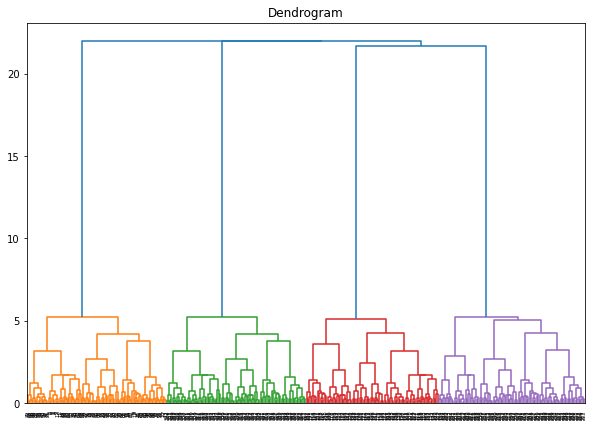

In [334]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters3 = shc.linkage(data_3_copy[['X1','X2','X3']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters3)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation metrics

#### For K-Means method

In [335]:
validation(predicted_class_km3,data_3_copy['Class'])

F1-score: 1.0
Accuracy: 1.0


#### For Hierarchical method

In [336]:
validation(predicted_class_h3,data_3_copy['Class'])

F1-score: 0.9753943217665615
Accuracy: 0.9877819548872181


### Plot data points and color them according to the original class

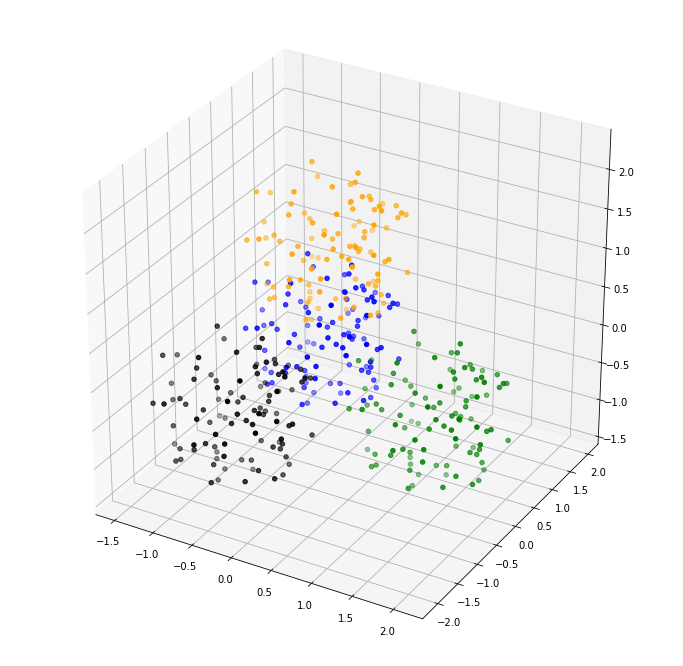

In [337]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 7 clusters separately by creating a df for each predicted class
df0 = data_3_copy[data_3_copy['Class']==1]
df1 = data_3_copy[data_3_copy['Class']==2]
df2 = data_3_copy[data_3_copy['Class']==3]
df3 = data_3_copy[data_3_copy['Class']==4]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
ax.scatter(df2['X1'], df2['X2'], df2['X3'], color='black')
ax.scatter(df3['X1'], df3['X2'], df3['X3'], color='orange')
plt.show()

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-means plot

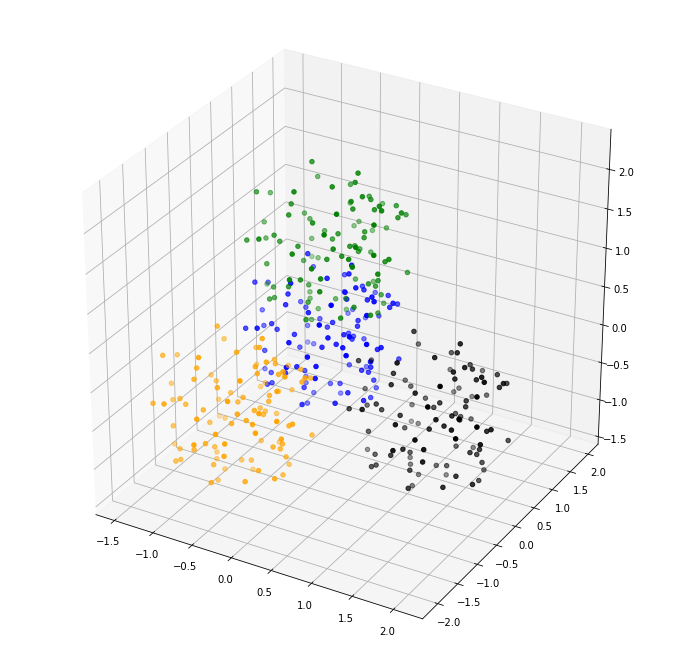

In [338]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df0 = data_3_copy[data_3_copy['predicted_class_km3']==0]
df1 = data_3_copy[data_3_copy['predicted_class_km3']==1]
df2 = data_3_copy[data_3_copy['predicted_class_km3']==2]
df3 = data_3_copy[data_3_copy['predicted_class_km3']==3]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
ax.scatter(df2['X1'], df2['X2'], df2['X3'], color='black')
ax.scatter(df3['X1'], df3['X2'], df3['X3'], color='orange')
plt.show()

#### Hierarchical plot

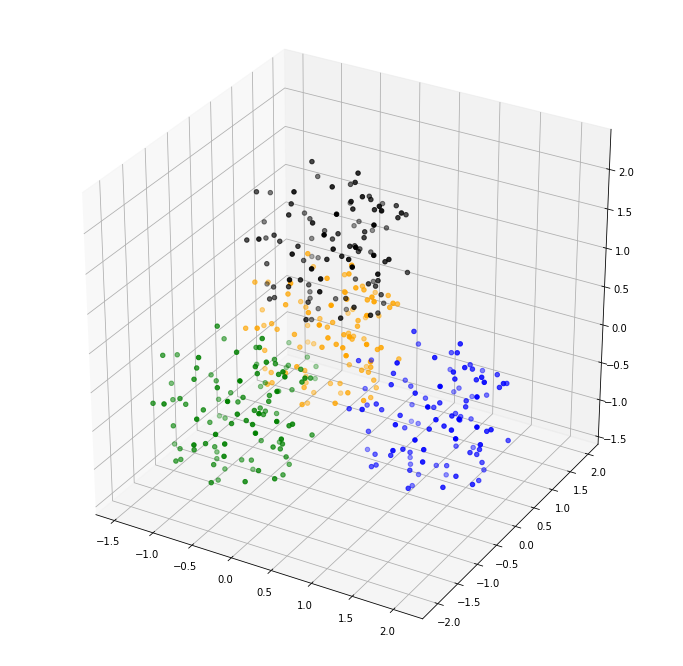

In [339]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df0 = data_3_copy[data_3_copy['predicted_class_h3']==0]
df1 = data_3_copy[data_3_copy['predicted_class_h3']==1]
df2 = data_3_copy[data_3_copy['predicted_class_h3']==2]
df3 = data_3_copy[data_3_copy['predicted_class_h3']==3]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
ax.scatter(df2['X1'], df2['X2'], df2['X3'], color='black')
ax.scatter(df3['X1'], df3['X2'], df3['X3'], color='orange')
plt.show()

## **For Data4.csv**

In [340]:
data_4.head()

Unnamed: 0      X1     X2       X3  Class
0           1 -0.4530 -0.891  0.02300      1
1           2  0.6530 -0.846  0.02110      1
2           3  0.3980  0.913 -0.00139      1
3           4  0.0952  1.050  0.00628      1
4           5  0.5240 -0.941  0.03780      1

In [341]:
data_4.describe()
### As the count of rows for each column is 1000, there are no missing values

Unnamed: 0           X1           X2           X3       Class
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000
mean    500.500000    -0.007884     0.429842    -0.007884     1.50000
std     288.819436     0.490354     0.875374     0.490354     0.50025
min       1.000000    -1.070000    -1.080000    -1.070000     1.00000
25%     250.750000    -0.083200    -0.181750    -0.083200     1.00000
50%     500.500000     0.002615     0.426500     0.002615     1.50000
75%     750.250000     0.081300     0.977000     0.081300     2.00000
max    1000.000000     1.070000     2.090000     1.070000     2.00000

In [342]:
print(data_4['Class'].unique())
### K=2

[1 2]


In [343]:
data_4_copy = data_4.copy()

In [344]:
data_4_copy.groupby(data_4_copy['Class'], as_index=False)['Unnamed: 0'].count()

Class  Unnamed: 0
0      1         500
1      2         500

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [345]:
km_data_4 = KMeans(n_clusters=2)

In [346]:
predicted_class_km4 = km_data_4.fit_predict(data_4_copy[['X1','X2','X3']])
predicted_class_km4

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [347]:
### Adding the predicted class as a column in the data_1_copy df
data_4_copy['predicted_class_km4'] = predicted_class_km4
data_4_copy.head()

Unnamed: 0      X1     X2       X3  Class  predicted_class_km4
0           1 -0.4530 -0.891  0.02300      1                    0
1           2  0.6530 -0.846  0.02110      1                    0
2           3  0.3980  0.913 -0.00139      1                    1
3           4  0.0952  1.050  0.00628      1                    1
4           5  0.5240 -0.941  0.03780      1                    0

#### Hierarchical clustering method

In [348]:
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
predicted_class_h4 = cluster4.fit_predict(data_4_copy[['X1','X2','X3']])
predicted_class_h4

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [349]:
data_4_copy['predicted_class_h4'] = predicted_class_h4
data_4_copy.head()

Unnamed: 0      X1     X2       X3  Class  predicted_class_km4  \
0           1 -0.4530 -0.891  0.02300      1                    0   
1           2  0.6530 -0.846  0.02110      1                    0   
2           3  0.3980  0.913 -0.00139      1                    1   
3           4  0.0952  1.050  0.00628      1                    1   
4           5  0.5240 -0.941  0.03780      1                    0   

   predicted_class_h4  
0                   1  
1                   1  
2                   0  
3                   0  
4                   1

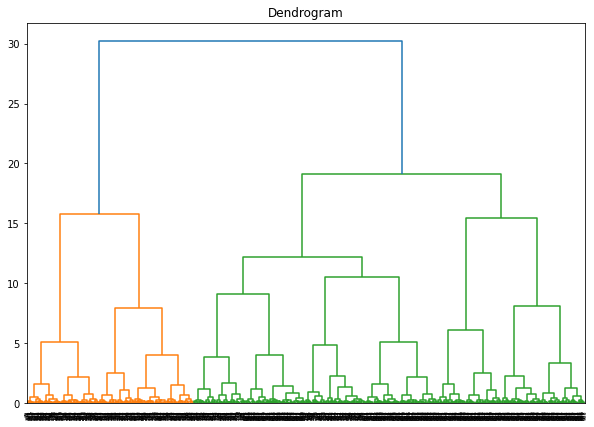

In [350]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters4 = shc.linkage(data_4_copy[['X1','X2','X3']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters4)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation metrics

#### For K-Means method

In [351]:
validation(predicted_class_km4,data_4_copy['Class'])

F1-score: 0.5459107296378164
Accuracy: 0.5463643643643644


#### For Hierarchical method

In [352]:
validation(predicted_class_h4,data_4_copy['Class'])

F1-score: 0.70226417822733
Accuracy: 0.6784804804804805


### Plot data points and color them according to the original class

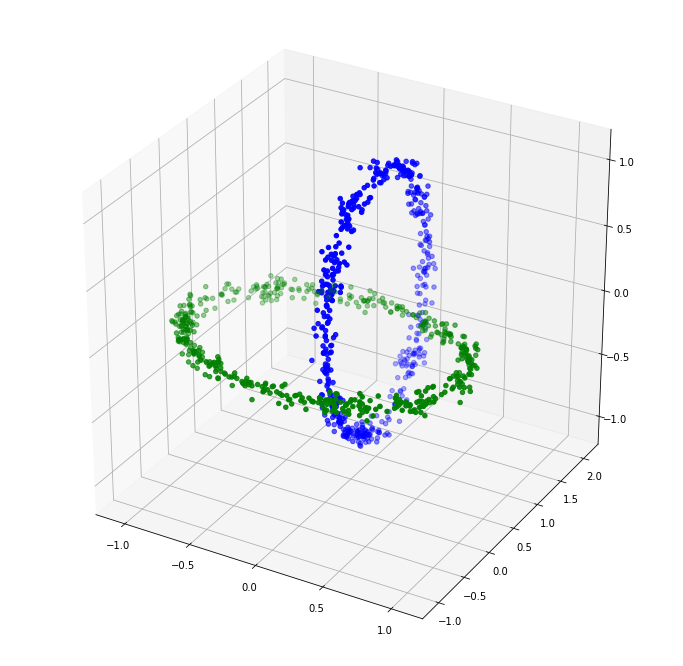

In [353]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df0 = data_4_copy[data_4_copy['Class']==1]
df1 = data_4_copy[data_4_copy['Class']==2]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-means plot

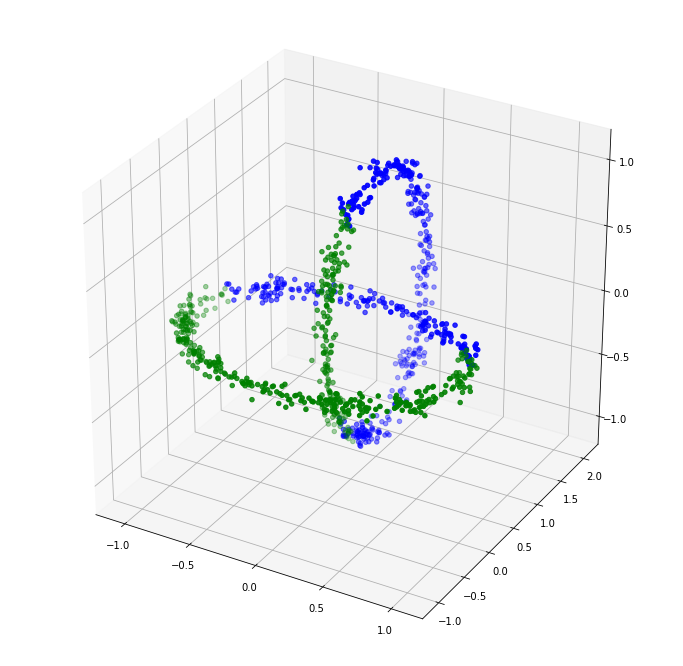

In [354]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df0 = data_4_copy[data_4_copy['predicted_class_km4']==0]
df1 = data_4_copy[data_4_copy['predicted_class_km4']==1]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')

#### Hierarchical plot

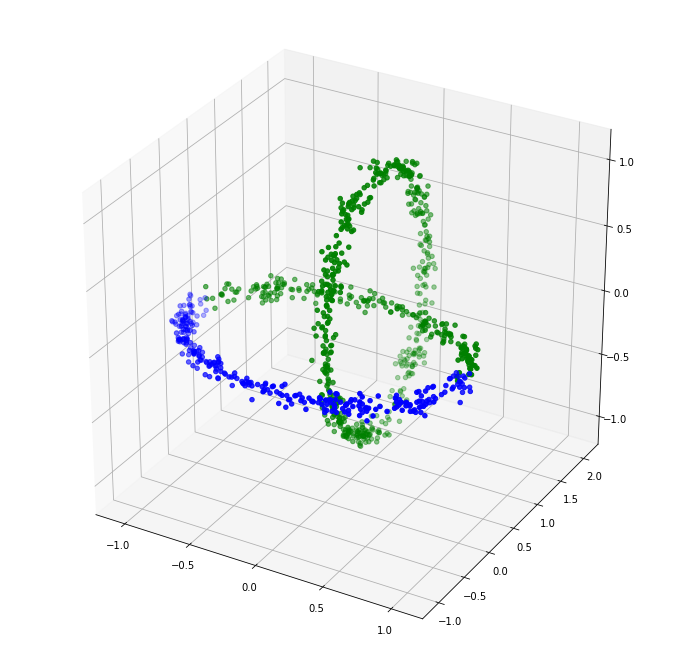

In [355]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df0 = data_4_copy[data_4_copy['predicted_class_h4']==0]
df1 = data_4_copy[data_4_copy['predicted_class_h4']==1]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')

## **For Data5.csv**

In [356]:
data_5.head()

Unnamed: 0         X1         X2         X3  Class
0           1  -4.822490 -50.402170   4.020861      1
1           2 -44.460120  20.964670 -11.492060      1
2           3  50.001020   0.780748   9.134460      1
3           4 -41.699080 -22.310060  16.314120      1
4           5   4.425242  -4.666664  50.223740      1

In [357]:
data_5.describe()

Unnamed: 0          X1          X2          X3       Class
count    800.0000  800.000000  800.000000  800.000000  800.000000
mean     400.5000   -0.611640   -0.921962    0.824385    1.500000
std      231.0844   18.771445   18.472153   23.941496    0.500313
min        1.0000  -49.464740  -50.461010  -50.592120    1.000000
25%      200.7500   -4.443038   -4.950855   -4.424578    1.000000
50%      400.5000    0.109752   -0.407613    0.537025    1.500000
75%      600.2500    4.713370    3.885574    6.120185    2.000000
max      800.0000   50.001020   50.598880   50.585700    2.000000

In [358]:
print(data_5['Class'].unique())

### K=2

[1 2]


In [359]:
data_5_copy = data_5.copy()

In [360]:
data_5_copy.groupby(data_5_copy['Class'], as_index=False)['Unnamed: 0'].count()

Class  Unnamed: 0
0      1         400
1      2         400

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [361]:
km_data_5 = KMeans(n_clusters=2)
predicted_class_km5 = km_data_5.fit_predict(data_5_copy[['X1','X2','X3']])
predicted_class_km5

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [362]:
data_5_copy['predicted_class_km5'] = predicted_class_km5
data_5_copy.head()

Unnamed: 0         X1         X2         X3  Class  predicted_class_km5
0           1  -4.822490 -50.402170   4.020861      1                    1
1           2 -44.460120  20.964670 -11.492060      1                    1
2           3  50.001020   0.780748   9.134460      1                    1
3           4 -41.699080 -22.310060  16.314120      1                    0
4           5   4.425242  -4.666664  50.223740      1                    0

#### Hierarchical clustering method

In [363]:
cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
predicted_class_h5 = cluster5.fit_predict(data_5_copy[['X1','X2','X3']])
predicted_class_h5

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [364]:
data_5_copy['predicted_class_h5'] = predicted_class_h5
data_5_copy.head()

Unnamed: 0         X1         X2         X3  Class  predicted_class_km5  \
0           1  -4.822490 -50.402170   4.020861      1                    1   
1           2 -44.460120  20.964670 -11.492060      1                    1   
2           3  50.001020   0.780748   9.134460      1                    1   
3           4 -41.699080 -22.310060  16.314120      1                    0   
4           5   4.425242  -4.666664  50.223740      1                    0   

   predicted_class_h5  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0

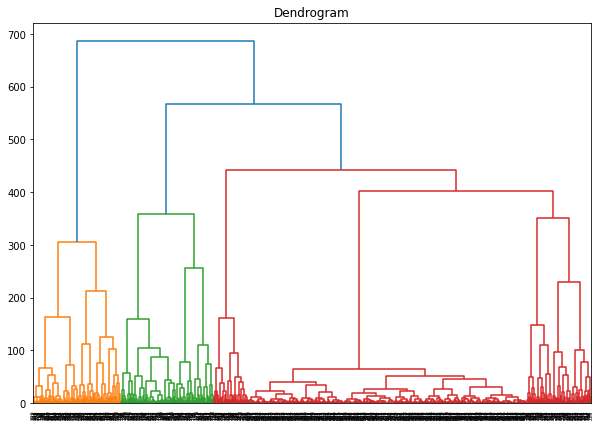

In [365]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters5 = shc.linkage(data_5_copy[['X1','X2','X3']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters5)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation metrics

#### For K-Means method

In [366]:
validation(predicted_class_km5,data_5_copy['Class'])

F1-score: 0.649655932331558
Accuracy: 0.5941051314142678


#### For Hierarchical method

In [367]:
validation(predicted_class_h5,data_5_copy['Class'])

F1-score: 0.634459109862127
Accuracy: 0.5490488110137672


### Plot data points and color them according to the original class

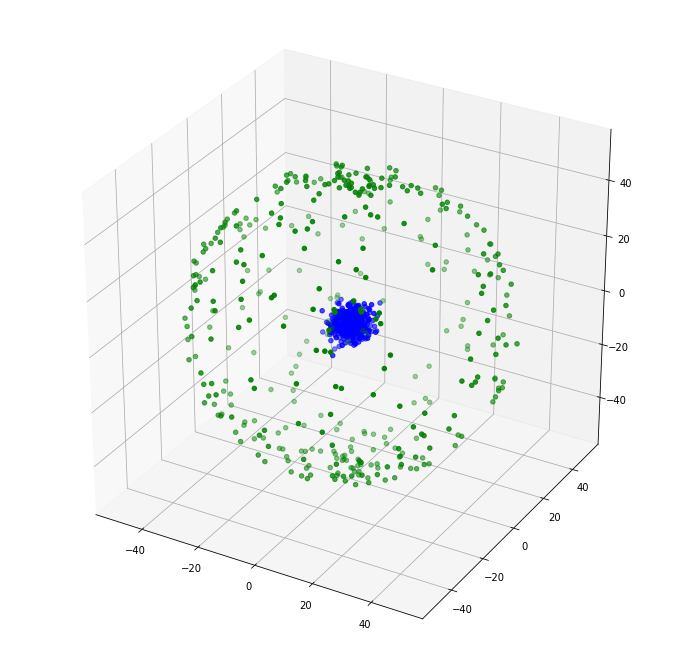

In [368]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 2 clusters separately by creating a df for each predicted class
df0 = data_5_copy[data_5_copy['Class']==1]
df1 = data_5_copy[data_5_copy['Class']==2]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
plt.show()

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-means

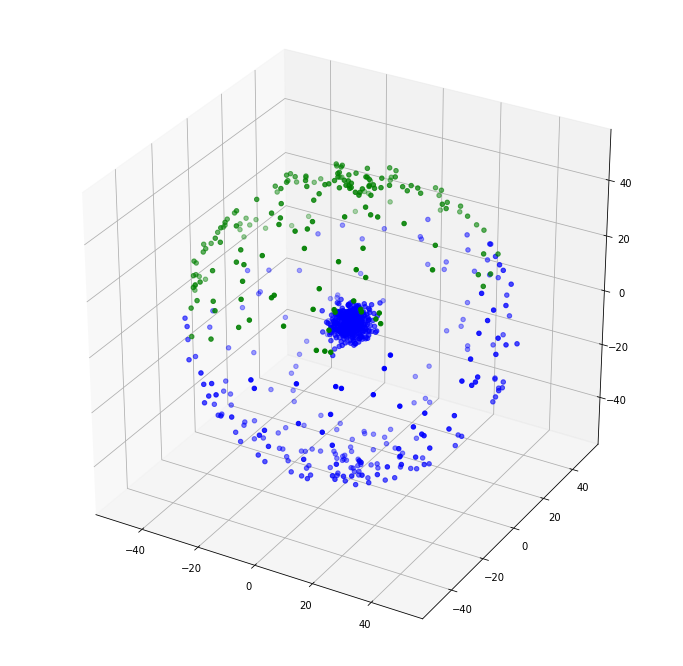

In [369]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 2 clusters separately by creating a df for each predicted class
df0 = data_5_copy[data_5_copy['predicted_class_km5']==0]
df1 = data_5_copy[data_5_copy['predicted_class_km5']==1]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
plt.show()

#### Hierarchical 

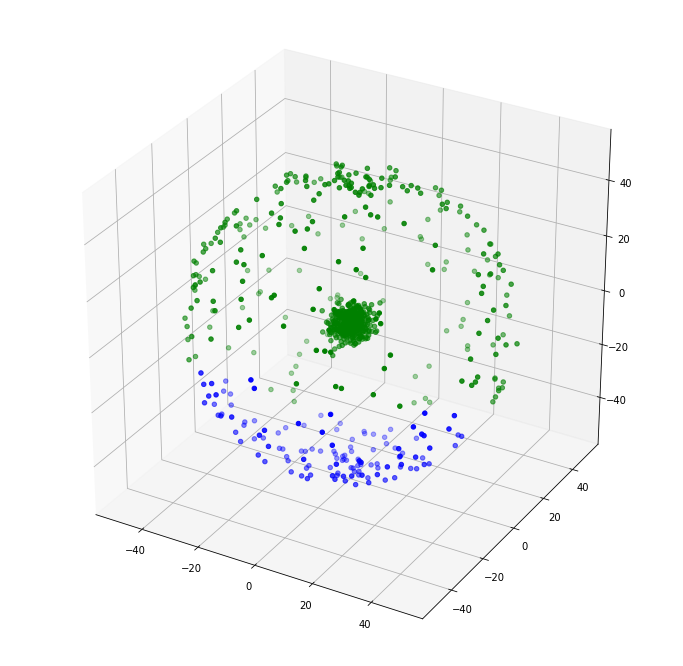

In [370]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Plotting the 2 clusters separately by creating a df for each predicted class
df0 = data_5_copy[data_5_copy['predicted_class_h5']==0]
df1 = data_5_copy[data_5_copy['predicted_class_h5']==1]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='green')
ax.scatter(df1['X1'], df1['X2'], df1['X3'], color='blue')
plt.show()

## **For Data6.csv**

In [371]:
data_6.head()

Unnamed: 0        X1        X2  Class
0           1  1.388261  2.076096      1
1           2  2.177247  3.102304      1
2           3  0.378645  5.307610      1
3           4  3.681732  1.622681      1
4           5  2.462861  2.777897      1

In [372]:
data_6.describe()

Unnamed: 0           X1           X2        Class
count  4096.00000  4096.000000  4096.000000  4096.000000
mean   2048.50000     1.279324     1.714045     1.500000
std    1182.55768     1.454175     1.732789     0.500061
min       1.00000    -3.075178    -3.298857     1.000000
25%    1024.75000     0.276844     0.371124     1.000000
50%    2048.50000     1.156726     1.494928     1.500000
75%    3072.25000     2.190571     2.983782     2.000000
max    4096.00000     6.728720     7.793648     2.000000

In [373]:
print(data_6['Class'].unique())

### K=2

[1 2]


In [374]:
data_6_copy = data_6.copy()

In [375]:
data_6_copy.groupby(data_6_copy['Class'], as_index=False)['Unnamed: 0'].count()

Class  Unnamed: 0
0      1        2048
1      2        2048

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [376]:
km_data_6 = KMeans(n_clusters=2)
predicted_class_km6 = km_data_6.fit_predict(data_6_copy[['X1','X2']])
predicted_class_km6

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [377]:
data_6_copy['predicted_class_km6'] = predicted_class_km6
data_6_copy.head()

Unnamed: 0        X1        X2  Class  predicted_class_km6
0           1  1.388261  2.076096      1                    0
1           2  2.177247  3.102304      1                    0
2           3  0.378645  5.307610      1                    0
3           4  3.681732  1.622681      1                    0
4           5  2.462861  2.777897      1                    0

#### Hierarchical clustering method

In [378]:
cluster6 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
predicted_class_h6 = cluster6.fit_predict(data_6_copy[['X1','X2']])
predicted_class_h6

array([0, 0, 0, ..., 1, 1, 1])

In [379]:
data_6_copy['predicted_class_h6'] = predicted_class_h6
data_6_copy.head()

Unnamed: 0        X1        X2  Class  predicted_class_km6  \
0           1  1.388261  2.076096      1                    0   
1           2  2.177247  3.102304      1                    0   
2           3  0.378645  5.307610      1                    0   
3           4  3.681732  1.622681      1                    0   
4           5  2.462861  2.777897      1                    0   

   predicted_class_h6  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

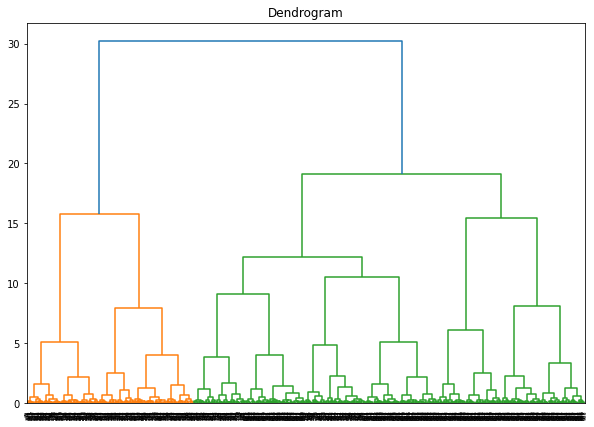

In [380]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters4 = shc.linkage(data_4_copy[['X1','X2','X3']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters4)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation metrics

#### For K-Means

In [381]:
validation(predicted_class_km6,data_6_copy['Class'])

F1-score: 0.9076338015386208
Accuracy: 0.907530262706044


#### For Hierarchical method

In [382]:
validation(predicted_class_h6,data_6_copy['Class'])

F1-score: 0.8602171722146869
Accuracy: 0.8592261904761904


### Plot data points and color them according to the original class

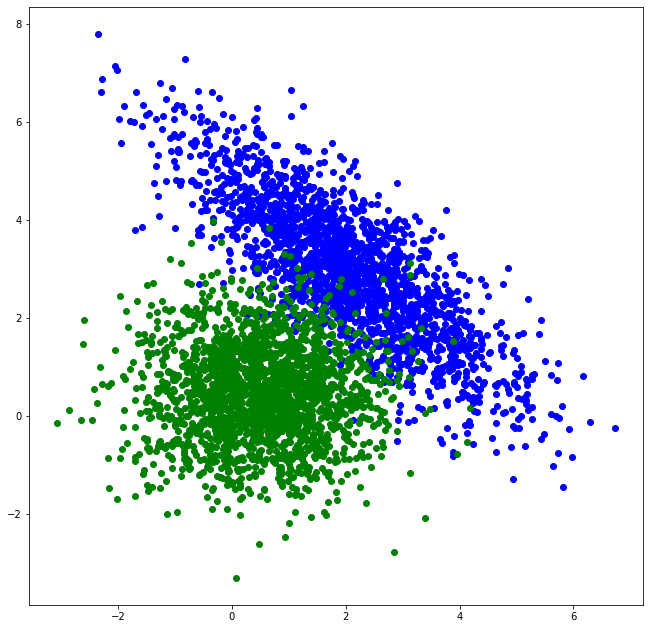

In [383]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='rectilinear')

df0 = data_6_copy[data_6_copy['Class']==1]
df1 = data_6_copy[data_6_copy['Class']==2]


ax.scatter(df0['X1'], df0['X2'], color='blue')
ax.scatter(df1['X1'], df1['X2'], color='green')
plt.show()

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-Means plot

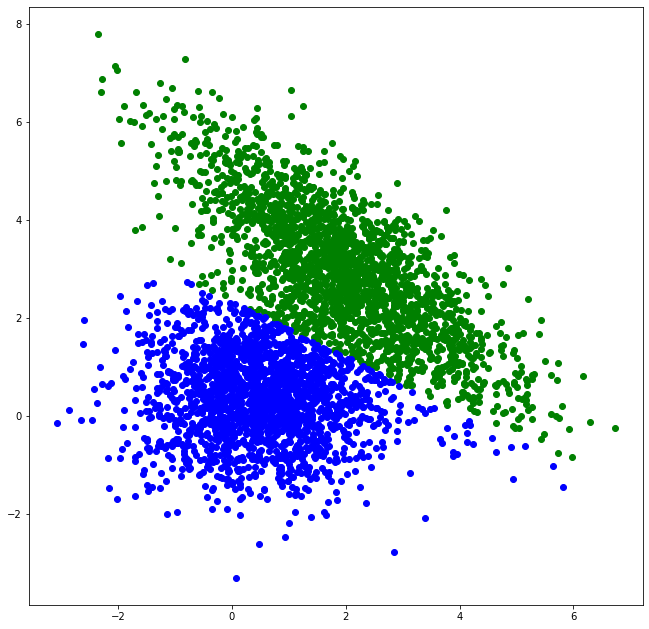

In [384]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='rectilinear')

df0 = data_6_copy[data_6_copy['predicted_class_km6']==0]
df1 = data_6_copy[data_6_copy['predicted_class_km6']==1]

ax.scatter(df0['X1'], df0['X2'], color='green')
ax.scatter(df1['X1'], df1['X2'], color='blue')
plt.show()

#### Hierarchical

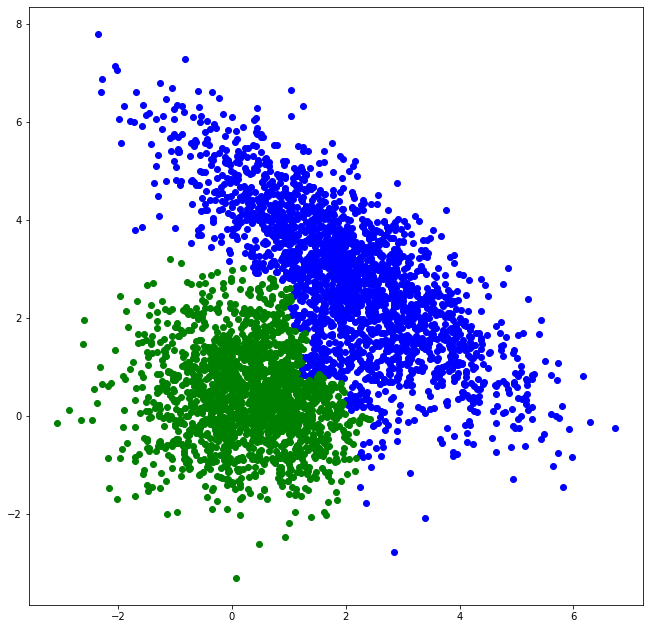

In [385]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='rectilinear')

df0 = data_6_copy[data_6_copy['predicted_class_h6']==0]
df1 = data_6_copy[data_6_copy['predicted_class_h6']==1]

ax.scatter(df0['X1'], df0['X2'], color='blue')
ax.scatter(df1['X1'], df1['X2'], color='green')
plt.show()

# **For Data7.csv**

In [386]:
data_7.head()

Unnamed: 0        X1        X2  Class
0           1 -3.000000 -3.000000      5
1           2 -3.000000  3.000000      4
2           3  3.000000 -3.000000      6
3           4  3.000000  3.000000      3
4           5 -0.417091  0.114782      1

In [387]:
data_7.describe()

Unnamed: 0          X1          X2       Class
count  770.000000  770.000000  770.000000  770.000000
mean   385.500000    0.015556    0.006572    1.525974
std    222.424144    0.961348    0.950428    0.636943
min      1.000000   -3.050000   -3.050000    1.000000
25%    193.250000   -0.394639   -0.368391    1.000000
50%    385.500000    0.000048   -0.021113    1.000000
75%    577.750000    0.395799    0.369805    2.000000
max    770.000000    3.050000    3.050000    6.000000

In [388]:
print(data_7['Class'].unique())

### K=6

[5 4 6 3 1 2]


In [389]:
data_7_copy = data_7.copy()

In [390]:
data_7_copy.groupby(data_7_copy['Class'], as_index=False)['Unnamed: 0'].count()

Class  Unnamed: 0
0      1         395
1      2         363
2      3           3
3      4           3
4      5           3
5      6           3

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [391]:
km_data_7 = KMeans(n_clusters=6)
predicted_class_km7 = km_data_7.fit_predict(data_7_copy[['X1','X2']])
predicted_class_km7

array([2, 4, 5, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [392]:
data_7_copy['predicted_class_km7'] = predicted_class_km7
data_7_copy.head()

Unnamed: 0        X1        X2  Class  predicted_class_km7
0           1 -3.000000 -3.000000      5                    2
1           2 -3.000000  3.000000      4                    4
2           3  3.000000 -3.000000      6                    5
3           4  3.000000  3.000000      3                    0
4           5 -0.417091  0.114782      1                    1

#### Hierarchical clustering method

In [393]:
cluster7 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
predicted_class_h7 = cluster7.fit_predict(data_7_copy[['X1','X2']])
predicted_class_h7

array([2, 3, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [394]:
data_7_copy['predicted_class_h7'] = predicted_class_h7
data_7_copy.head()

Unnamed: 0        X1        X2  Class  predicted_class_km7  \
0           1 -3.000000 -3.000000      5                    2   
1           2 -3.000000  3.000000      4                    4   
2           3  3.000000 -3.000000      6                    5   
3           4  3.000000  3.000000      3                    0   
4           5 -0.417091  0.114782      1                    1   

   predicted_class_h7  
0                   2  
1                   3  
2                   0  
3                   1  
4                   4

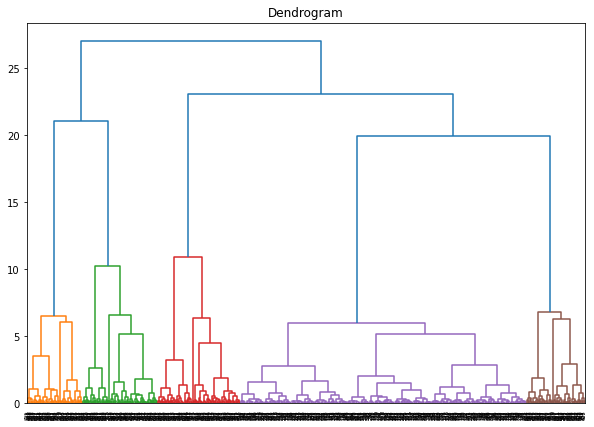

In [395]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters7 = shc.linkage(data_7_copy[['X1','X2']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters7)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation metrics

#### For K-Means method

In [396]:
validation(predicted_class_km7,data_7_copy['Class'])

F1-score: 0.7735335459459918
Accuracy: 0.8198740141522977


#### For Hierarchical method

In [397]:
validation(predicted_class_h7,data_7_copy['Class'])

F1-score: 0.7760924720343255
Accuracy: 0.8214479928394103


### Plot data points and color them according to the original class

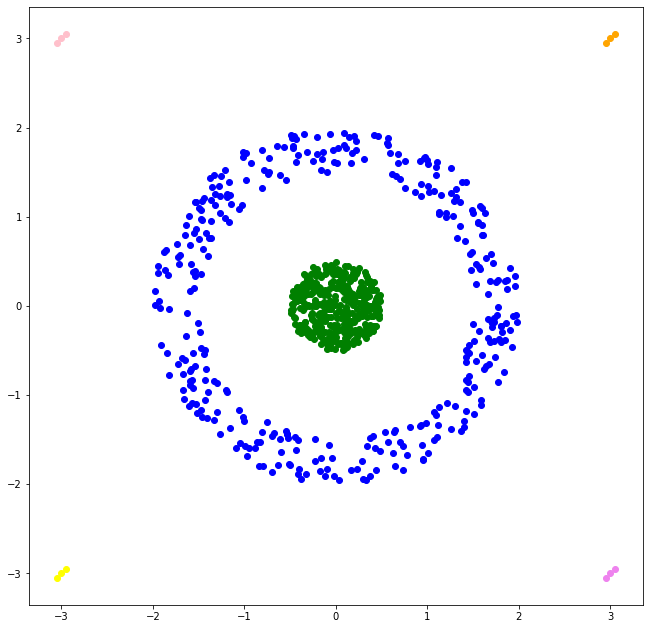

In [398]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='rectilinear')

df0 = data_7_copy[data_7_copy['Class']==1]
df1 = data_7_copy[data_7_copy['Class']==2]
df2 = data_7_copy[data_7_copy['Class']==3]
df3 = data_7_copy[data_7_copy['Class']==4]
df4 = data_7_copy[data_7_copy['Class']==5]
df5 = data_7_copy[data_7_copy['Class']==6]

ax.scatter(df0['X1'], df0['X2'], color='green')
ax.scatter(df1['X1'], df1['X2'], color='blue')
ax.scatter(df2['X1'], df2['X2'], color='orange')
ax.scatter(df3['X1'], df3['X2'], color='pink')
ax.scatter(df4['X1'], df4['X2'], color='yellow')
ax.scatter(df5['X1'], df5['X2'], color='violet')
plt.show()

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-Means plot

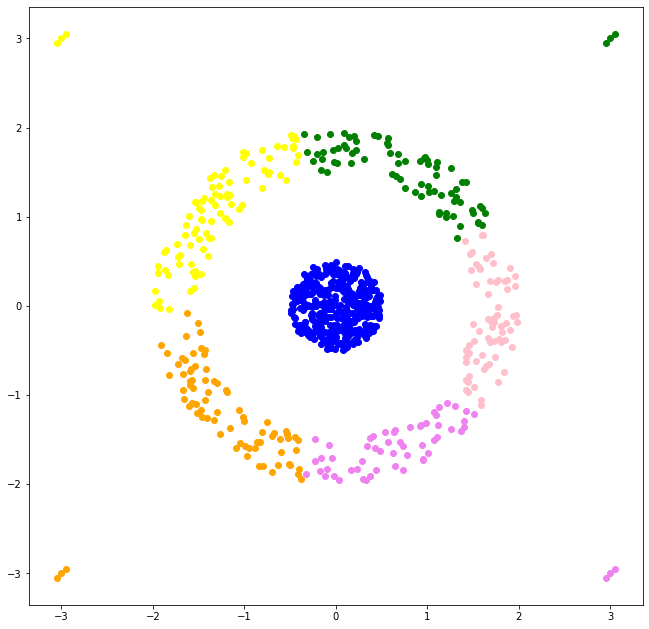

In [399]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='rectilinear')

df0 = data_7_copy[data_7_copy['predicted_class_km7']==0]
df1 = data_7_copy[data_7_copy['predicted_class_km7']==1]
df2 = data_7_copy[data_7_copy['predicted_class_km7']==2]
df3 = data_7_copy[data_7_copy['predicted_class_km7']==3]
df4 = data_7_copy[data_7_copy['predicted_class_km7']==4]
df5 = data_7_copy[data_7_copy['predicted_class_km7']==5]

ax.scatter(df0['X1'], df0['X2'], color='green')
ax.scatter(df1['X1'], df1['X2'], color='blue')
ax.scatter(df2['X1'], df2['X2'], color='orange')
ax.scatter(df3['X1'], df3['X2'], color='pink')
ax.scatter(df4['X1'], df4['X2'], color='yellow')
ax.scatter(df5['X1'], df5['X2'], color='violet')
plt.show()

#### Hierarchical

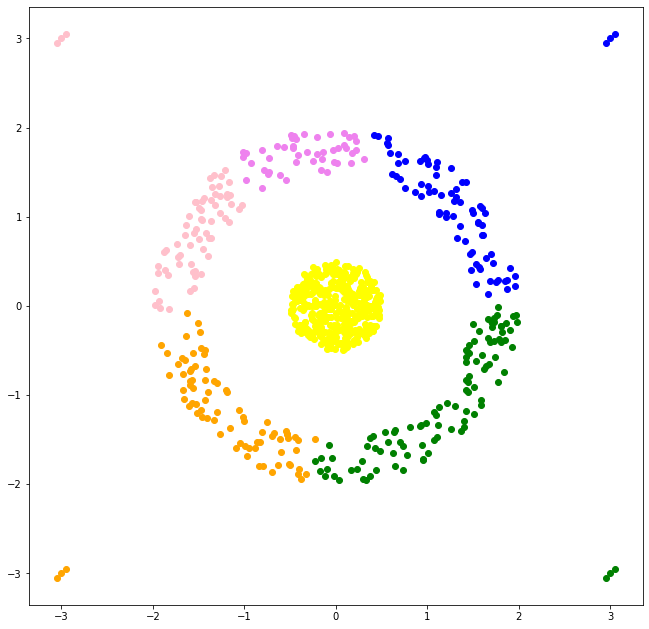

In [400]:
### Plotting a 3D scatter plot
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='rectilinear')

# Plotting the 6 clusters separately by creating a df for each predicted class
df0 = data_7_copy[data_7_copy['predicted_class_h7']==0]
df1 = data_7_copy[data_7_copy['predicted_class_h7']==1]
df2 = data_7_copy[data_7_copy['predicted_class_h7']==2]
df3 = data_7_copy[data_7_copy['predicted_class_h7']==3]
df4 = data_7_copy[data_7_copy['predicted_class_h7']==4]
df5 = data_7_copy[data_7_copy['predicted_class_h7']==5]

ax.scatter(df0['X1'], df0['X2'], color='green')
ax.scatter(df1['X1'], df1['X2'], color='blue')
ax.scatter(df2['X1'], df2['X2'], color='orange')
ax.scatter(df3['X1'], df3['X2'], color='pink')
ax.scatter(df4['X1'], df4['X2'], color='yellow')
ax.scatter(df5['X1'], df5['X2'], color='violet')
plt.show()

# **For Data8.csv**

In [401]:
data_8.head()

Unnamed: 0        X1        X2       X3  Class
0           1  0.000000  0.000000  1.00000      1
1           2  0.000000  0.052336  0.99863      1
2           3  0.049774  0.016173  0.99863      1
3           4  0.030762 -0.042341  0.99863      1
4           5 -0.030762 -0.042341  0.99863      1

In [402]:
data_8.describe()

Unnamed: 0            X1            X2           X3   Class
count  4002.000000  4.002000e+03  4.002000e+03  4002.000000  4002.0
mean   2001.500000 -1.775469e-18 -6.658009e-19     0.000000     1.0
std    1155.422217  5.792099e-01  5.792099e-01     0.573831     0.0
min       1.000000 -1.000000e+00 -1.000000e+00    -1.000000     1.0
25%    1001.250000 -5.069495e-01 -5.039030e-01    -0.500000     1.0
50%    2001.500000  0.000000e+00  0.000000e+00     0.000000     1.0
75%    3001.750000  5.069495e-01  5.039030e-01     0.500000     1.0
max    4002.000000  1.000000e+00  1.000000e+00     1.000000     1.0

In [403]:
print(data_8['Class'].unique())

### K=1

[1]


In [404]:
data_8_copy = data_8.copy()

In [405]:
data_8_copy.groupby(data_8_copy['Class'], as_index=False)['Unnamed: 0'].count()

Class  Unnamed: 0
0      1        4002

### Use K-means and hierarchical clustering methods to generate clusters

#### K-means clustering method

In [406]:
km_data_8 = KMeans(n_clusters=1)
predicted_class_km8 = km_data_8.fit_predict(data_8_copy[['X1','X2','X3']])
predicted_class_km8

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [407]:
data_8_copy['predicted_class_km8'] = predicted_class_km8
data_8_copy.head()

Unnamed: 0        X1        X2       X3  Class  predicted_class_km8
0           1  0.000000  0.000000  1.00000      1                    0
1           2  0.000000  0.052336  0.99863      1                    0
2           3  0.049774  0.016173  0.99863      1                    0
3           4  0.030762 -0.042341  0.99863      1                    0
4           5 -0.030762 -0.042341  0.99863      1                    0

#### Hierarchical clustering method

In [408]:
cluster8 = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')  
predicted_class_h8 = cluster8.fit_predict(data_8_copy[['X1','X2','X3']])
predicted_class_h8

array([0, 0, 0, ..., 0, 0, 0])

In [409]:
data_8_copy['predicted_class_h8'] = predicted_class_h8
data_8_copy.head()

Unnamed: 0        X1        X2       X3  Class  predicted_class_km8  \
0           1  0.000000  0.000000  1.00000      1                    0   
1           2  0.000000  0.052336  0.99863      1                    0   
2           3  0.049774  0.016173  0.99863      1                    0   
3           4  0.030762 -0.042341  0.99863      1                    0   
4           5 -0.030762 -0.042341  0.99863      1                    0   

   predicted_class_h8  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

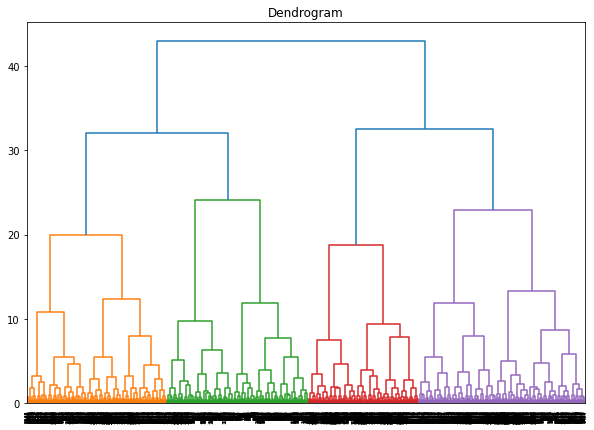

In [410]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters8 = shc.linkage(data_8_copy[['X1','X2','X3']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters8)
plt.show()

### Evaluate the performance of the clustering algorithm using external validation metrics

As the number of clusters is 1 according to the external information, there is no need to cluster the data. From the graphs, it can be seen that the distribution is homogenous.

Hency we can expect an accuracy of 100%

#### For K-Means method

In [411]:
validation(predicted_class_km8,data_8_copy['Class'])

F1-score: 1.0
Accuracy: 1.0


#### For Hierarchical method

In [412]:
validation(predicted_class_h8,data_8_copy['Class'])

F1-score: 1.0
Accuracy: 1.0


### Plot data points and color them according to the original class

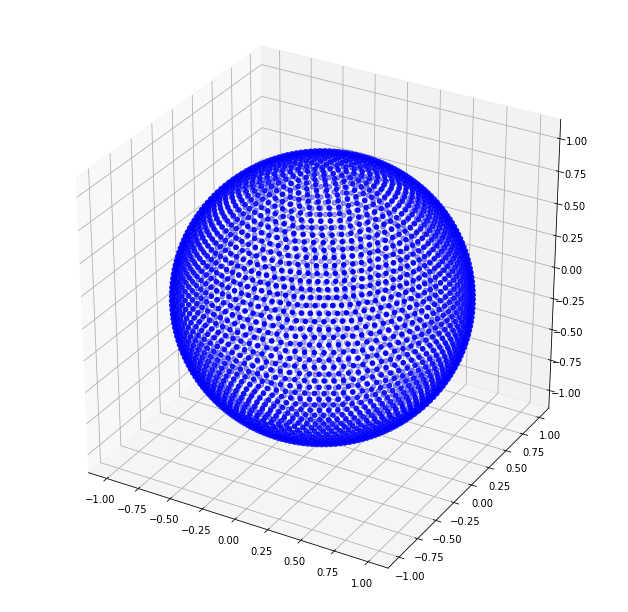

In [413]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='3d')

df0 = data_8_copy[data_8_copy['Class']==1]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='blue')

plt.show()

### Plot data points and color them according to the class allocated by the clustering algorithm

#### K-means plot

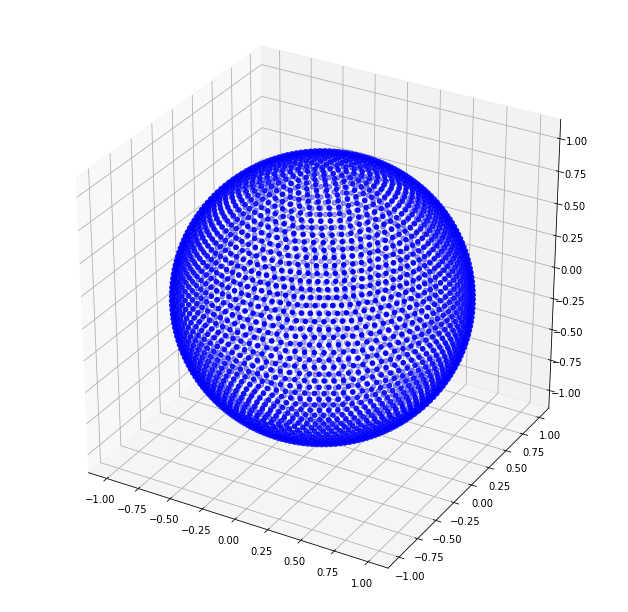

In [414]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='3d')

df0 = data_8_copy[data_8_copy['predicted_class_km8']==0]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='blue')

plt.show()

#### Hierarchical plot

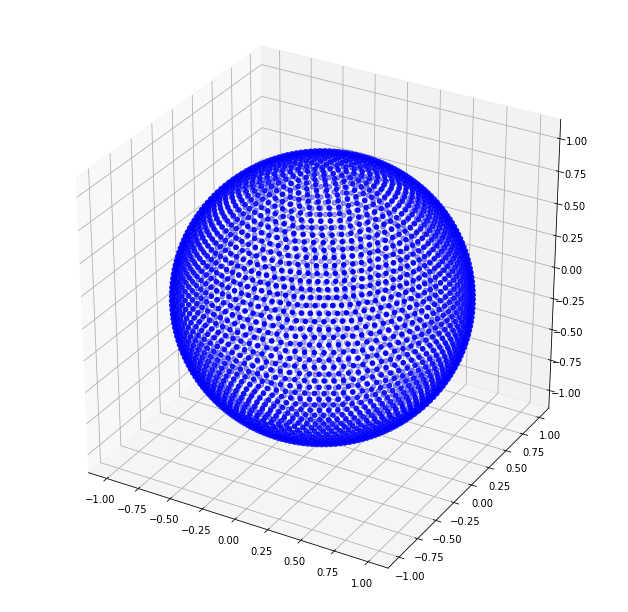

In [415]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection='3d')

df0 = data_8_copy[data_8_copy['predicted_class_h8']==0]

ax.scatter(df0['X1'], df0['X2'], df0['X3'], color='blue')

plt.show()

# Converting to HTML

In [416]:
# !jupyter nbconvert --to html Assignment_2_Niresh_Subramanian.ipynb